In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
from matplotlib import cm
%matplotlib inline

## Lecture 25

### Learning objectives

- Learn about 3D plots of points and surfaces.
- Show some examples with subduction zone Earthquakes and isotopic systems.

### 25.1 3D Plotting with Python

Contour plots are really just a way to visualize something that is inherently 3D on a 2D surface.  Think about our topographic map - the contour intervals are elevations and our brains can reconstruct the 3D world by looking at the contours on the map.  But with computers we can visualize the 3D world in a more realistic manner.  There are many 3D plotting packages that apply many different approaches to plot in 3D.  For example,  **mplot3d**, is a 3D toolkit of **matplotlib** that uses the same logic as for "regular" **matplotlib**. For more on this module, see:

http://matplotlib.sourceforge.net/mpl_toolkits/mplot3d/index.html

### 25.2 3D Plotting in Jupyter Notebooks
Until now, we have used `%matplotlib inline` to plot our matplotlib figures within the Jupyter notebook.  In order to plot a 3D figure within the Jupyter notebook and allow interaction with a 3D plot, we must use this alternative:
```
%matplotlib notebook
```

### 25.3 Plotting points in 3D

Remember this plot from Lecture 17?

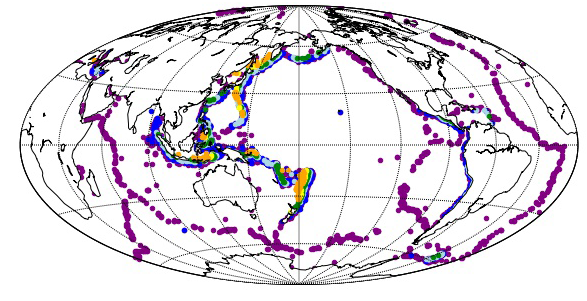

In [2]:
Image(filename='Figures/earthquakes_depth.png')

We used color to represent the depth of each earthquake . You can see that there are increasingly deep earthquakes as you move away from subduction zones- sort of.  

It would be more instructive to view the depth of the earthquakes as points in a 3D plot.   So, let's read-in the data, filter for a lat/lon box from 35$^{\circ}$S to 15$^{\circ}$S and 175$^{\circ}$E to 190$^{\circ}$E (the Marianas trench), and plot the data in 3D.

To begin, let's filter the data by the desired bounds and make an array of longitudes (`x`), an array of latitudes (`y`) and an array of depths (`z`).  

In [3]:
# Read in the data from the Lecture 18 as a pandas DataFrame: 
eq_data = pd.read_csv('Datasets/EarthquakeLocations/last5Years.csv', skiprows=1)

# Define some boundaries for our box
lat_min, lon_min, lat_max, lon_max = -35.0, 175.0, -15.0, 190.0

# Use Pandas filtering to fish out lat/lon in this range
box = eq_data[(eq_data.longitude.values%360 < lon_max) & (eq_data.longitude.values%360 >= lon_min)] 
box = box[(box.latitude.values < lat_max) & (box.latitude.values >= lat_min)] 

# Export them to NumPy arrays
x = box.longitude.values%360
y = box.latitude.values
z = -box.depth.values

We can use the `Axes3D` class from the **mplot3d**, which is another tool in the **matplotlib** toolkit (`mpl_toolkits`).

We will import the `Axes3D` module.  

But before we can use it, we have to make the notebook ready for 3D plots.  One somewhat annoying thing about using the 3D options in a Jupyter notebook is that there are two different **magic** commands that are used.  You are already familiar with the `%matplotlib inline` command that allows us to plot "regular" matplotlib plots in the notebook. But now we need a NEW one:  `%matplotlib notebook` strictly for plotting 3D objects.  The trouble comes when you try to do both in one notebook, because you have to always use the magic correct command before you can see your figure. So we import the `Axes3D` module and call the magic command:
```
%matplotlib notebook
```

In [4]:
# Import the module
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

The trick to using `Axes3D` is to first make a figure object using `plt.figure()` (called `fig` below) and then  use the figure method `fig.add_subplot()` to make an `Axis` instance (here called `ax`). Finally we set the keyword `projection` of the `add_sublot()` call to `'3d'`.   

<IPython.core.display.Javascript object>


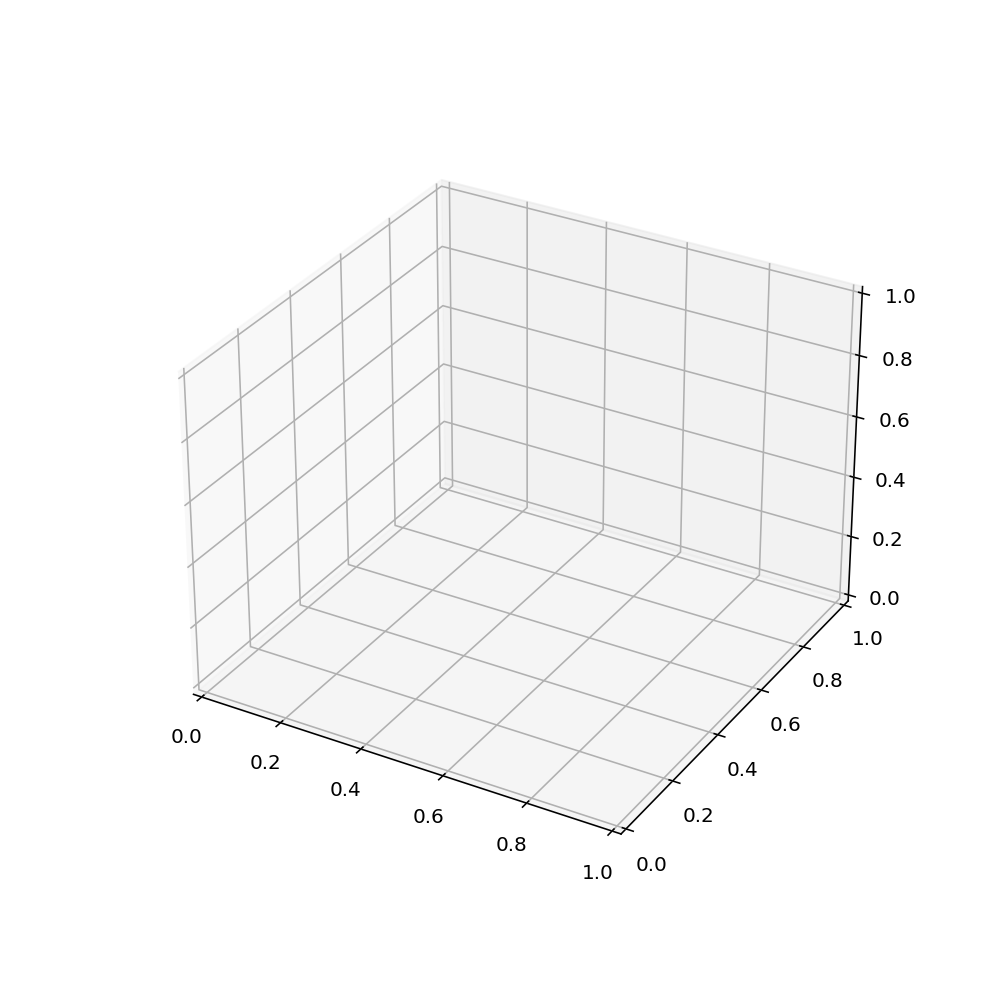

In [5]:
fig = plt.figure(1, (7, 7)) # We need to make a figure object
ax = fig.add_subplot(111, projection='3d');

This makes an empty set of axes.   But you can twirl them around!  [Okay, I thought that was cool.]  


Now we can decorate the plot with some data.  

<IPython.core.display.Javascript object>


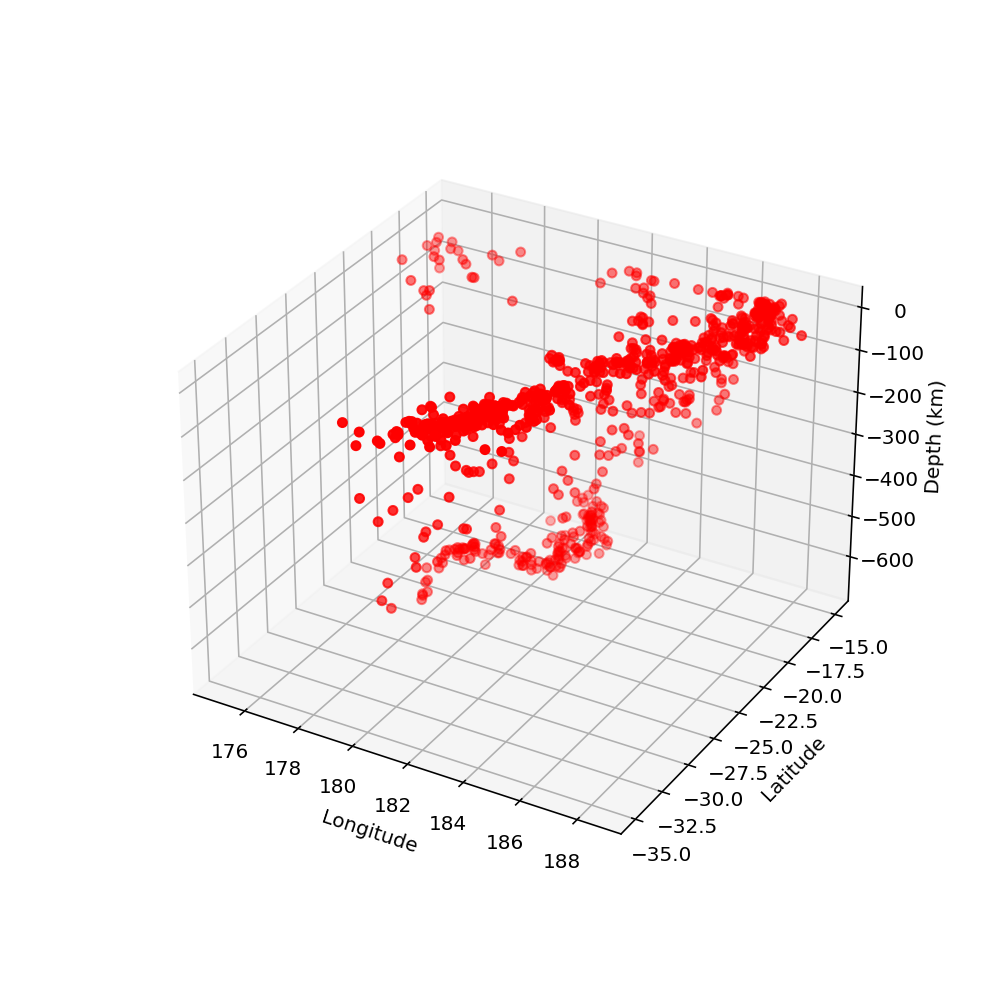

In [6]:
fig = plt.figure(2, (7, 7)) # Let's make a new one.
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Depth (km)');

Try twirling the figure around!  Can you see the slab?  

You can imagine other enhancements, for example setting the size of the points to be proportional to the size of the earthquake.

### 25.4 3D contour type plots

In Lecture 24, we learned how to make 2D color contour plots, but 3D is much more fun, so let's try to make a 3D version of something geophysical, namely the gravity anomaly of a buried sphere. 

Let's choose a sphere with a radius $R$ of 2 m (whose volume is ${{4\pi}\over{3}}R^3$), that is buried $z=$ 3 m deep.  The sphere's density ($\Delta \rho$) is 500 kg/m$^3$, which is, for this purpose, much higher than the surrounding material.    Oh and we'll need the universal gravitational constant $G$, which is  6.67x 10$^{-11}$ Nm$^2$/kg$^2$.

The formula for gravitational attraction of such a body is: 

$$g= {{4\pi}\over{3}} R^3 {{G   \Delta \rho}\over{(h^2+z^2})},$$

where $h$ is the horizontal distance from the mass.

The units (from dimensional analysis remembering that Newtons are kg $\cdot$ m $\cdot$ s$^2$) are m $\cdot$ s$^{-2}$.  1 Gal (for Galileo) = 1 cm $\cdot$s$^{-2}$, so to convert $g$ to the units of microgals, we multiply the above by 10$^{8}$.  

We can write our equation as a `lambda` function.

In [7]:
gravity = lambda G, R, drho, h, z : (1.0e8 * G * 4.0 * np.pi * R**3.0 * drho) / (3.0 * (h**2 + z**2)) # Gravitational attraction. 

And set up the arrays the same way as we did in the previous lectures as a color contour on a 2D surface. 




In [8]:
from matplotlib import tri

In [9]:
x = np.arange(-6.0, 6.0, 0.1) # Range of x values
y = np.arange(-6.0, 6.0, 0.1) # Range of y values
X, Y = np.meshgrid(x, y) # Make a meshgrid object

To get the gravity array $g$, we need $z,G,R$ and $\Delta \rho$ and $h$ the horizontal distance from ground zero of the buried sphere, which is given by good old Pythagorous as: 

$$ h=\sqrt {x^2 + y^2}. $$  



In [10]:
# Define the other parameters
z = 3.0
G = 6.67e-11 # Grav. constant in Nm^2/kg^2 (SI)
R = 2.0 # Radius in meters
drho = 500.0 # Density contrast in kg/m^3

h = np.sqrt(X**2 + Y**2) # Get the horizontal distance from ground zero for x, y
# and make the g array
g = gravity(G, R, drho, h, z) # Multipy by a million to get the units reasonable for the plots.

We want to make the plot of the gravitational attraction first using our old friend from the Lecture 24, `plt.pcolormesh()`. 

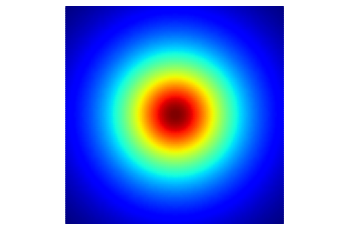

In [11]:
# Put this back to 'normal' for use in the notebook using the correct Jupyter magic command 
%matplotlib inline 

plt.figure(3)
plt.pcolormesh(x, y, g, cmap=cm.jet, shading='gouraud')
plt.axis('equal')
plt.axis('off');

Well that is pretty.  But now we want to do this in 3D.

### 25.5 3D surfaces

There are a few ways to  plot this in 3D: wireframes and surfaces. Let's start with a wireframe plot. For this we need to  use matplotlib `Axes3D`.  

#### Wireframes
There is an `Axes3D` method called `plot_wireframe()` which will do the trick. It is in many ways similar to the `pcolormesh()`, but instead of using color to represent values, it uses a 3D projection.   
Let's try the `plot_wireframe()` function on our gravity data.  

In the following plot, we  create an `Axes3D` instance called `ax` from the `figure` object, `fig`. By setting `projection='3d'`, we get a 3D projection.

Remember that because we were just plotting in 2D (`%matplotlib inline`), we have to call the 3D version (`%matplotlib notebook`).

<IPython.core.display.Javascript object>


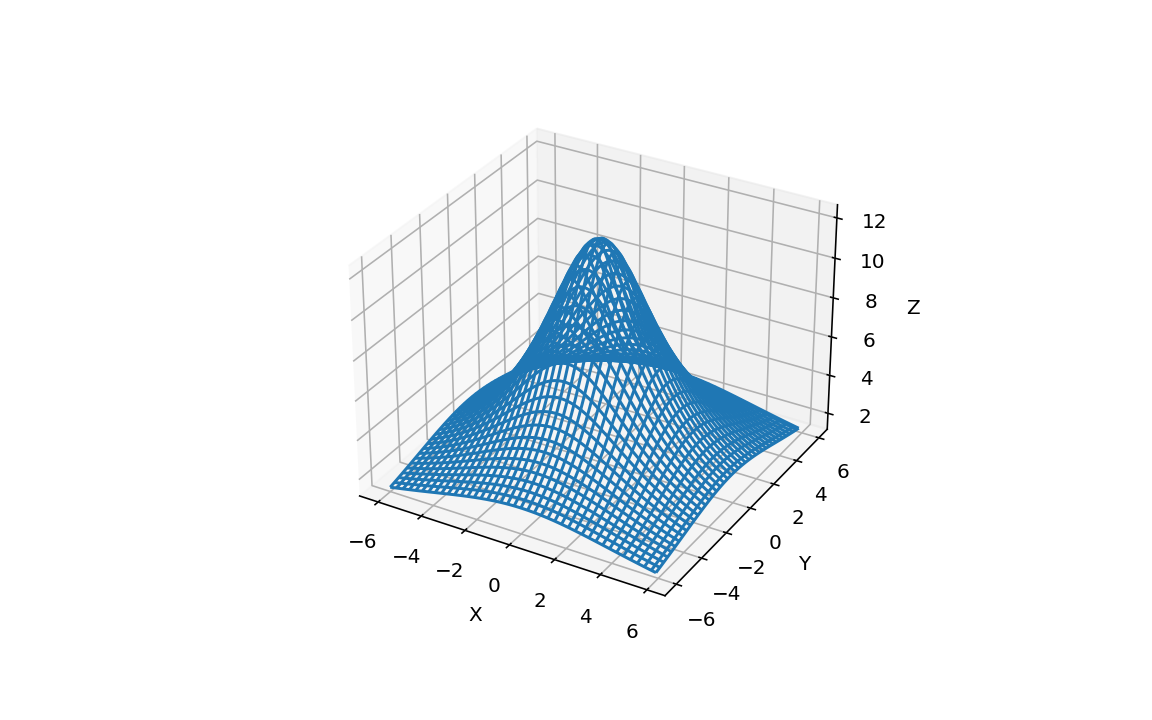

In [12]:
# Makes a 3D plot in a notebook
%matplotlib notebook  

fig = plt.figure(4, (8, 5)) # Make a figure object
ax = fig.add_subplot(111, projection='3d') # Give it the powers of an Axes3D object
surf = ax.plot_wireframe(X, Y, g) # Use plot_wireframe to do the plot.
ax.set_xlabel('X') # and label the axes
ax.set_ylabel('Y')
ax.set_zlabel('Z');

Try twirling it around - pretty cool, huh?  

#### Surfaces

There is a related  method `plot_surface()` which is also nice. We then call `plot_surface()` on the `Axes3D` instance and set labels to the 3 axis. Note that if we assign the surface instance to a variable, e.g., `surf`, we can do other things to it, like add a color bar.  Finally, please admire the use of a colormap  (`cmap=cm.rainbow`).

This works pretty much like `plot_wireframe()` but this one we can put a color bar on too.

<IPython.core.display.Javascript object>


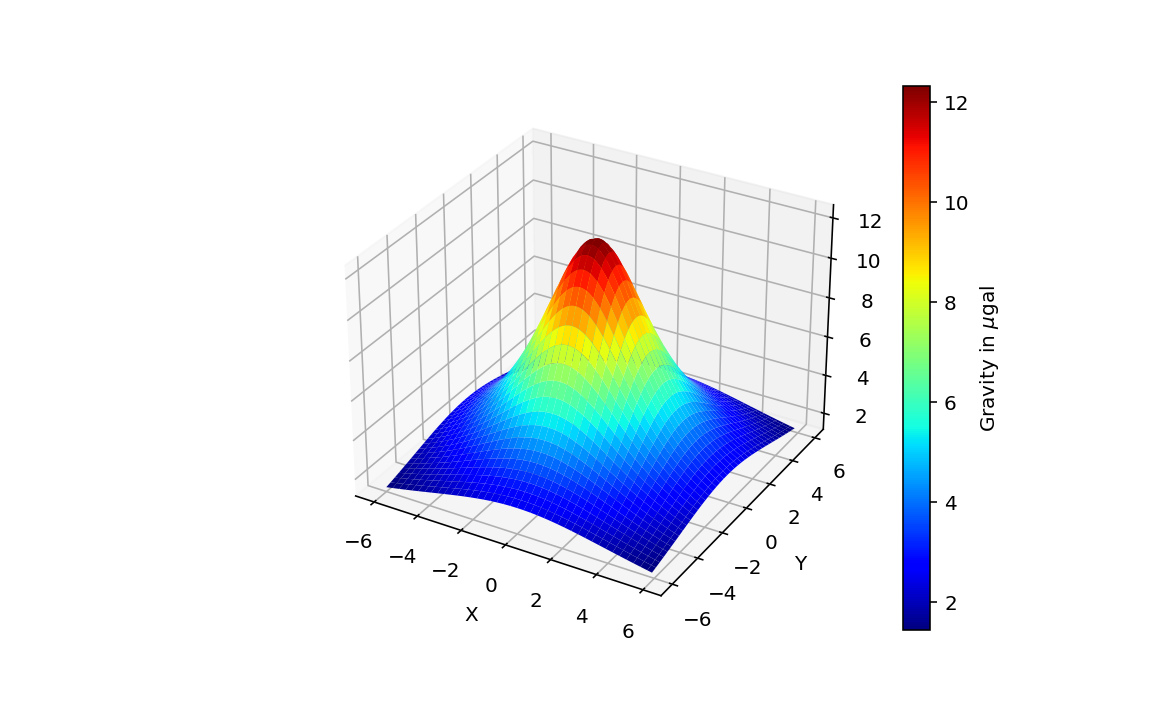

In [13]:
# Make the notebook ready for interactive 3D plots again
%matplotlib notebook 

fig = plt.figure(4, (8, 5)) # Make a figure object
ax = fig.add_subplot(111, projection='3d') # Get a 3d plot object
surf = ax.plot_surface(X, Y, g, cmap=cm.jet) # Use plot_surface to do the plot using a color map
ax.set_xlabel('X') # and label the axes
ax.set_ylabel('Y')
ax.set_zlabel('Z')
bar = fig.colorbar(surf) # Put on the color bar
bar.set_label('Gravity in $\mu$gal'); # Label the color bar

We can also plot the data as a 3D color contour plot. For this, we can use `ax.contour()`.

<IPython.core.display.Javascript object>


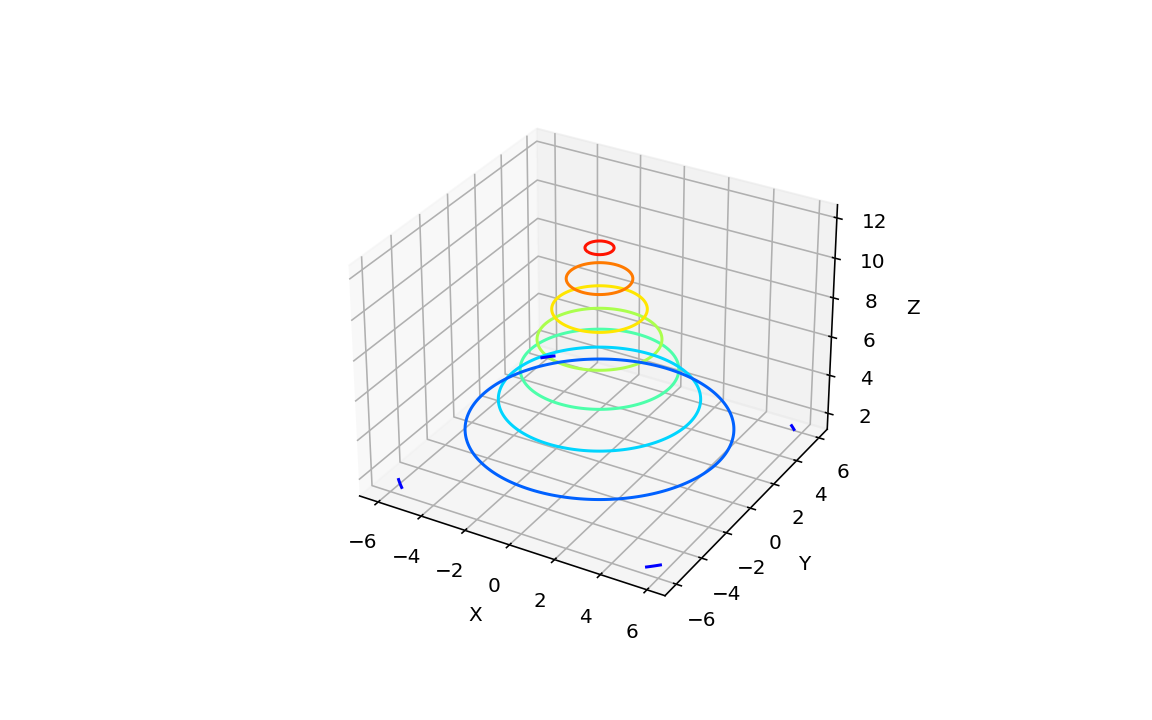

In [14]:
%matplotlib notebook 

fig = plt.figure(5, (8, 5)) # Make a figure object
ax = fig.add_subplot(111, projection='3d') # Give it the powers of an Axes3D object
surf = ax.contour(X, Y, g, cmap=cm.jet) # Use contour to do the plot using a color map
ax.set_xlabel('X') # and label the axes
ax.set_ylabel('Y')
ax.set_zlabel('Z');

And `ax.contour3D()` does the same thing. Here, I've added a color bar.

<IPython.core.display.Javascript object>


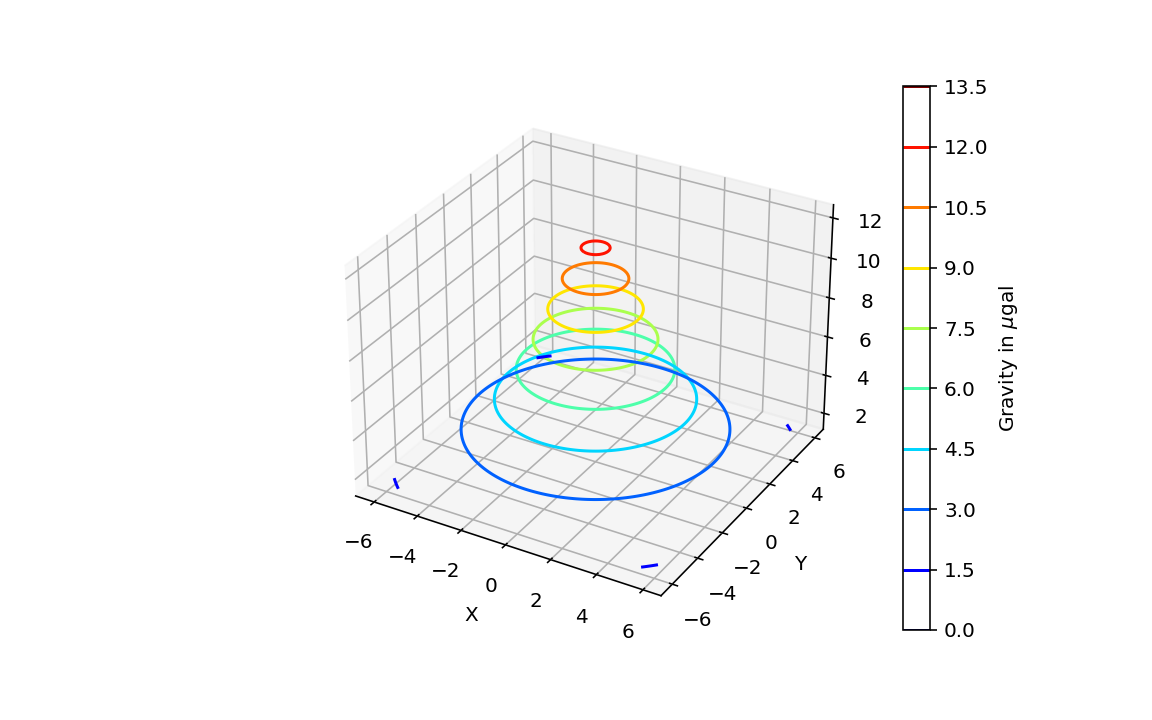

In [15]:
# Make the notebook ready for interactive 3D plots again
%matplotlib notebook 

fig = plt.figure(4, (8, 5)) # Make a figure object
ax = fig.add_subplot(111, projection='3d') # Get a 3d plot object
surf = ax.contour3D(X, Y, g, cmap=cm.jet) # Use plot_surface to do the plot using a color map
ax.set_xlabel('X') # and label the axes
ax.set_ylabel('Y')
ax.set_zlabel('Z')
bar = fig.colorbar(surf) # Put on the color bar
bar.set_label('Gravity in $\mu$gal'); # Label the color bar

We can even make a wedding cake setting the `extend3d` keyword of the `ax.contour()` function to `True`. 

<IPython.core.display.Javascript object>


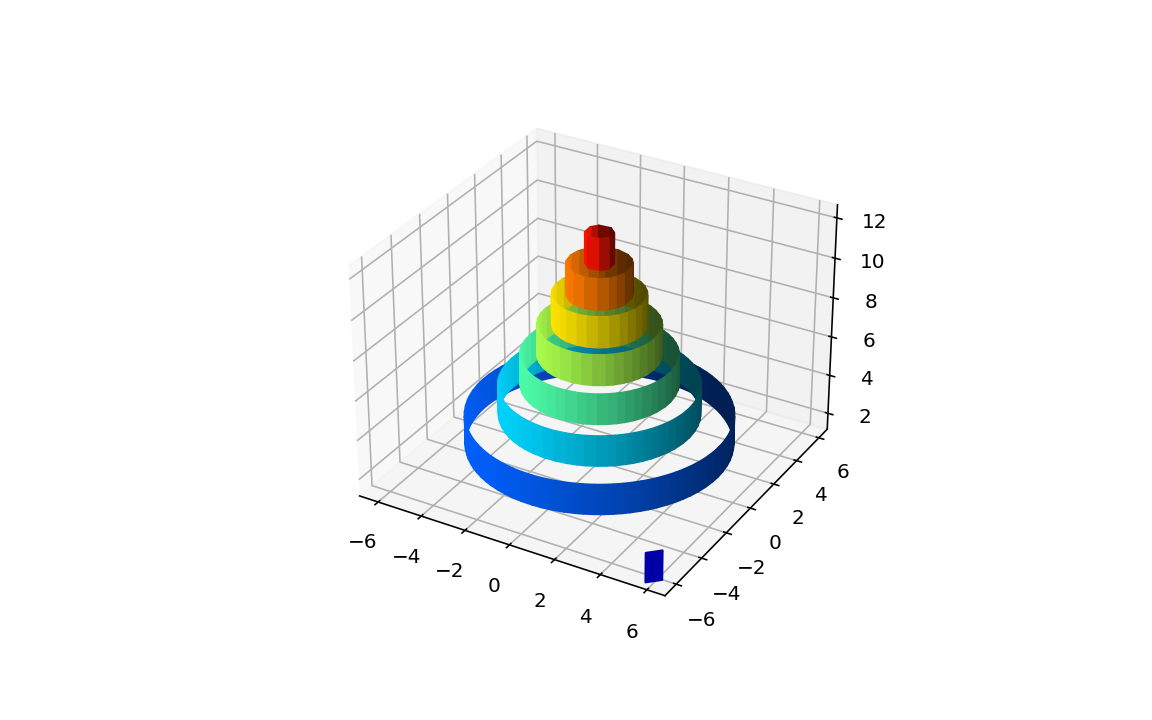

In [16]:
%matplotlib notebook

fig = plt.figure(5, (8, 5)) # Make a figure object
ax = fig.add_subplot(111, projection='3d') # Give it the powers of an Axes3D object
surf = ax.contour(X, Y, g, extend3d=True, cmap=cm.jet) # Use contour to do the plot using a color map

Or to really get into it, we can plot contours onto projected planes using the `ax.contour()` method. The keyword `offset` sets where each plane will be put and the `zdir` keyword says which axis to project. You just have to play with this a while, to see how it works.  

<IPython.core.display.Javascript object>


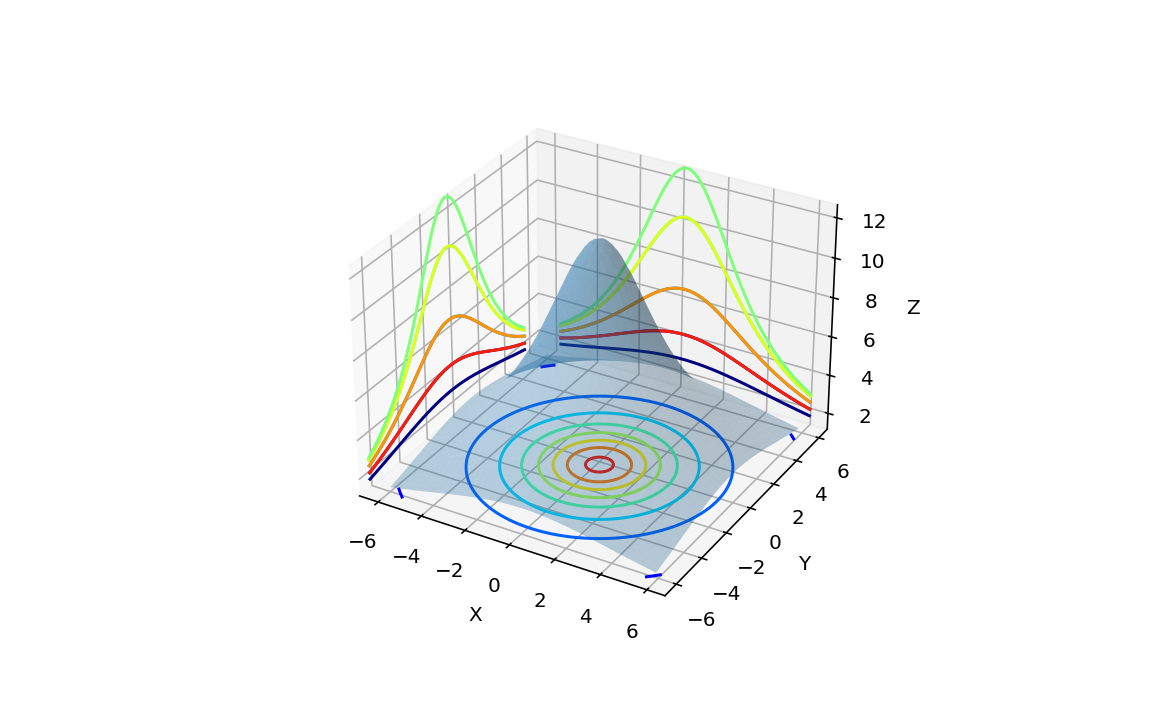

In [17]:
%matplotlib notebook 

fig = plt.figure(6, (8, 5)) # Make a figure object
ax = fig.add_subplot(111, projection='3d') # Give it the powers of an Axes3D object
surf = ax.plot_surface(X, Y, g, alpha=0.3) 
cset = ax.contour(X, Y, g,zdir='z', offset=1, cmap=cm.jet)
cset = ax.contour(X, Y, g,zdir='x', offset=-7, cmap=cm.jet)
cset = ax.contour(X, Y, g,zdir='y', offset=7, cmap=cm.jet)
ax.set_xlabel('X') # and label the axes
ax.set_ylabel('Y')
ax.set_zlabel('Z');

### 25.6 Plotting vectors

Before we leave the gravity anomaly problem, consider one more way to plot the data. Gravity data are inherently vectors, so we could plot them as arrows. This can be done  using the `plt.quiver()` method.

In [18]:
help(plt.quiver)

Help on function quiver in module matplotlib.pyplot:

quiver(*args, data=None, **kw)
    Plot a 2D field of arrows.
    
    Call signature::
    
      quiver([X, Y], U, V, [C], **kw)
    
    *X*, *Y* define the arrow locations, *U*, *V* define the arrow directions, and
    *C* optionally sets the color.
    
    **Arrow size**
    
    The default settings auto-scales the length of the arrows to a reasonable size.
    To change this behavior see the *scale* and *scale_units* parameters.
    
    **Arrow shape**
    
    The defaults give a slightly swept-back arrow; to make the head a
    triangle, make *headaxislength* the same as *headlength*. To make the
    arrow more pointed, reduce *headwidth* or increase *headlength* and
    *headaxislength*. To make the head smaller relative to the shaft,
    scale down all the head parameters. You will probably do best to leave
    minshaft alone.
    
    **Arrow outline**
    
    *linewidths* and *edgecolors* can be used to customize the

So we need the x, y coordinates of the gravity vector and plot the arrows
at the evaluation points. 

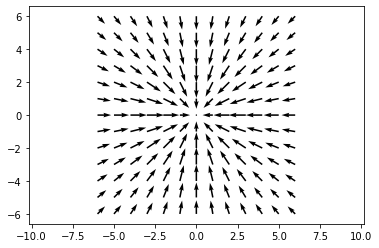

In [19]:
# We need toredo what we already did, but at lower resolution
%matplotlib inline

z = 3.0
G = 6.67e-11 # Grav. constant in Nm^2/kg^2 (SI)
R = 2.0 # Radius in meters
drho = 500.0 # Density contrast in kg/m^3

h = np.sqrt(X**2 + Y**2) # Get the horizontal distance from ground zero for x,y
# and make the g array
g = gravity(G, R, drho, h, z) # Multipy by a million to get the units reasonable for the plots.

x = np.arange(-6.0, 7.0, 1.0) # Range of x values
y = np.arange(-6.0, 7.0, 1.0) # Range of y values
X, Y = np.meshgrid(x, y) # Make a meshgrid object
h = np.sqrt(X**2 + Y**2) # Get the horizontal distance from ground zero for x, y
g = gravity(G, R, drho, h, z) # Re-use our lambda function

# Now make the horizontal projections along X and Y
U = -X * g
V = -Y * g
# and plot
plt.quiver(x, y, U, V)
plt.axis('equal');

There is a lovely plotting package called **Plotly** with lots more options (although not 3D). One of them is a nicer quiver plot option, `plotly.create_quiver()`. Let's take a look: 

In [20]:
import plotly.figure_factory as ff

In [21]:
%matplotlib inline

fig = ff.create_quiver(X, Y, U, V)
fig.show() # Ror some reason, this plotting option requires this line.  

### 25.7 Multi dimensional data

What if you have data with more than two dimensions? A good example of this is with isotopic data from Ocean Island Basalts. Isotopic systems are used to "finger-print" different sources of melt in the mantle. It is used to characterize what is deep in the Earth using what gets brought up to form the ocean islands. By now there are data available for many different isotopic systems. Here we take a look at a small sample of what is in the GeoRoc database (http://georoc.mpch-mainz.gwdg.de/georoc/) for ocean island basalts. Let's load the isotopic dataset.

In [3]:
MantleArray = pd.read_csv('Datasets/GeoRoc/MantleArray_OIB.csv')
MantleArray.head()

CITATION  EPSILON_HF  EPSILON_ND  HF176_HF177  \
0   [60] STILLE P. (1986)   14.534010    7.607708     0.283196   
1   [60] STILLE P. (1986)   10.538041    6.378770     0.283083   
2   [60] STILLE P. (1986)   11.033117    6.281235     0.283097   
3   [60] STILLE P. (1986)   12.164719    5.696027     0.283129   
4   [60] STILLE P. (1986)   15.135173    5.891097     0.283213   

  LAND/SEA (SAMPLING)  LATITUDE (MAX.)  LATITUDE (MIN.)           LOCATION  \
0           SUBAERIAL            19.83            19.83  HAWAIIAN ISLANDS    
1           SUBAERIAL            22.00            22.00  HAWAIIAN ISLANDS    
2           SUBAERIAL            22.00            22.00  HAWAIIAN ISLANDS    
3           SUBAERIAL            21.15            21.15  HAWAIIAN ISLANDS    
4           SUBAERIAL            21.16            21.16  HAWAIIAN ISLANDS    

  LOCATION COMMENT  LONGITUDE (MAX.)  ...  PB208_PB204   ROCK NAME  \
0              NaN           -155.42  ...       38.017  ANKARAMITE   
1    NAPALI MEMBER           -159.50  ...       37.803   THOLEIITE   
2    NAPALI MEMBER           -159.50  ...       37.962   THOLEIITE   
3              NaN           -156.97  ...       37.751   THOLEIITE   
4              NaN           -157.23  ...       37.754   THOLEIITE   

       ROCK TYPE     SAMPLE NAME  SAMPLING TECHNIQUE SR87_SR86  \
0  VOLCANIC ROCK     samp. 79MK1             OUTCROP   0.70347   
1  VOLCANIC ROCK     samp. KAU-1             OUTCROP   0.70384   
2  VOLCANIC ROCK   samp. 1D872-2             OUTCROP   0.70364   
3  VOLCANIC ROCK  samp. 71WMOL-1             OUTCROP   0.70378   
4  VOLCANIC ROCK  samp. 71WMOL-3             OUTCROP   0.70376   

  TECTONIC SETTING TYPE OF MATERIAL     UNIQUE_ID  Year  
0     OCEAN ISLAND       WHOLE ROCK     107-79MK1  1986  
1     OCEAN ISLAND       WHOLE ROCK       5-KAU-1  1986  
2     OCEAN ISLAND       WHOLE ROCK           NaN  1986  
3     OCEAN ISLAND       WHOLE ROCK  782-71WMOL-1  1986  
4     OCEAN ISLAND       WHOLE ROCK  783-71WMOL-3  1986  

[5 rows x 24 columns]

There are lots of different isotope ratios available. In this lecture, we focus on four different isotopic ratios: $^{87}$Sr/$^{86}$Sr , $^{206}$Pb/$^{204}$Pb , $ \varepsilon$ Nd and $ \varepsilon$ Hf. (The ratios with an $ \varepsilon$ are the isotope ratios relative to a standard value in parts per 10000, this allows you to see the variation better as it is normally very small).

So, how do you plot multi-dimensional data? 

We can use some concepts from Lecture 24 and apply a PCA approach to split the data into the principal components. 

Before doing that, we will use a new trick to create a discrete color map based on an input color map. 
Each discrete color will be used to represent one component.
Here's a function `discrete_cmap()` that does it: 

In [8]:
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return color_list

Now apply PCA like we did in Lecture 24 to split the data into principal components. 

In [9]:
from sklearn.decomposition import PCA

X_PCA = np.array([MantleArray['EPSILON_ND'], MantleArray['SR87_SR86'], MantleArray['PB206_PB204'],\
                        MantleArray['EPSILON_HF']])
X_PCA = X_PCA.T

pca = PCA(3)
pca.fit(X_PCA)
Y_pca = pca.transform(X_PCA)

In [10]:
MantleArray['PCA_1'] = Y_pca[:, 0]
MantleArray['PCA_2'] = Y_pca[:, 1]
MantleArray['PCA_3'] = Y_pca[:, 2]

Now let's plot the end members in 3D! 

<IPython.core.display.Javascript object>


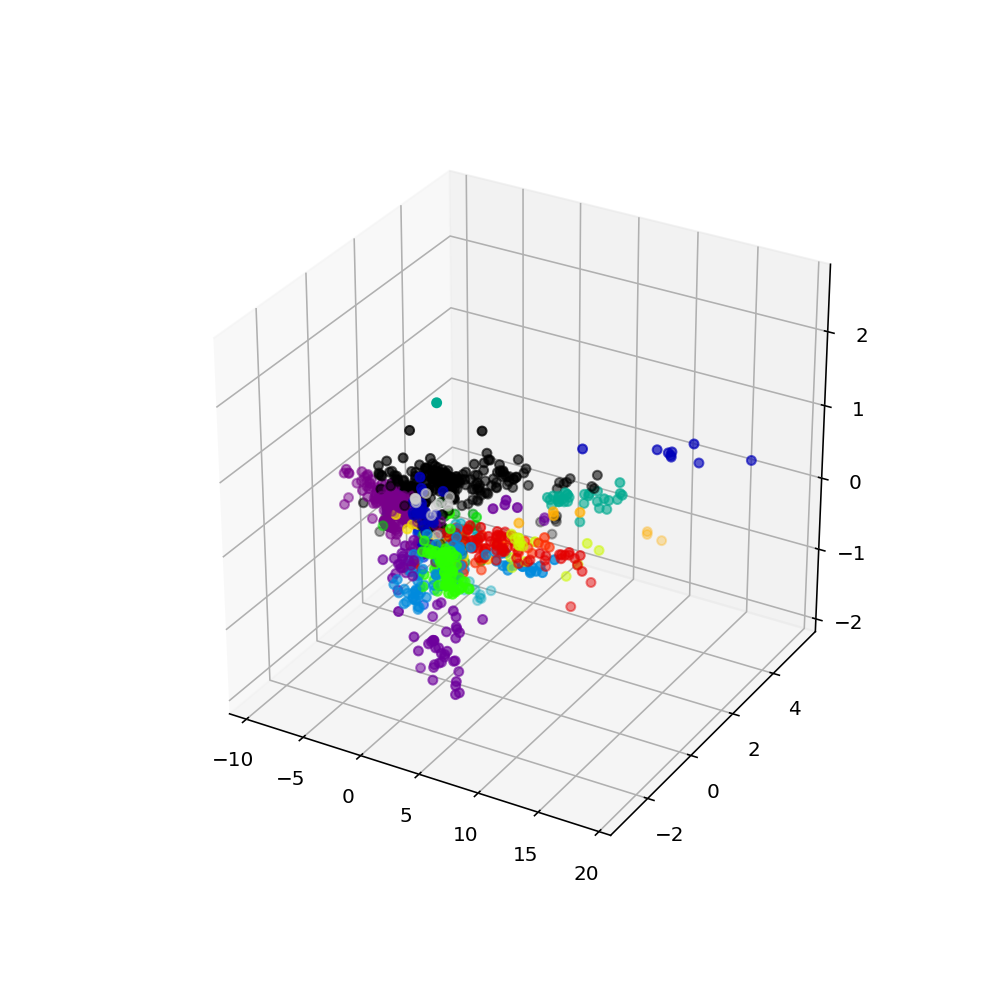

In [11]:
%matplotlib notebook

fig = plt.figure(2, (7, 7)) # Let's make a new one.
ax = fig.add_subplot(111, projection='3d')

locations = MantleArray['LOCATION'].unique() # Get a list of unique locations
colors = discrete_cmap(len(locations), base_cmap='nipy_spectral') # Get the color map
# Assign the colors
MantleArray['COLOR'] = [[0, 0, 0, 0] for n in list(range(len(MantleArray)))]

# Step through the locations and plot the data using the specified colors
for n in list(range(len(locations))):
    newslice = MantleArray.loc[MantleArray.LOCATION == locations[n], 'COLOR']

    colorlist = pd.Series([colors[n] for m in list(range(len(newslice)))], index=newslice.index)
    MantleArray.loc[MantleArray.LOCATION == locations[n], 'COLOR'] = colorlist

ax.scatter(MantleArray['PCA_1'], MantleArray['PCA_2'], MantleArray['PCA_3'], c = MantleArray['COLOR'].values);

This lecture was just a sample of what is possible with 3D plotting.  Here are more examples that may inspire you.  Check out this website:  https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html  for  hints on how to do more.   

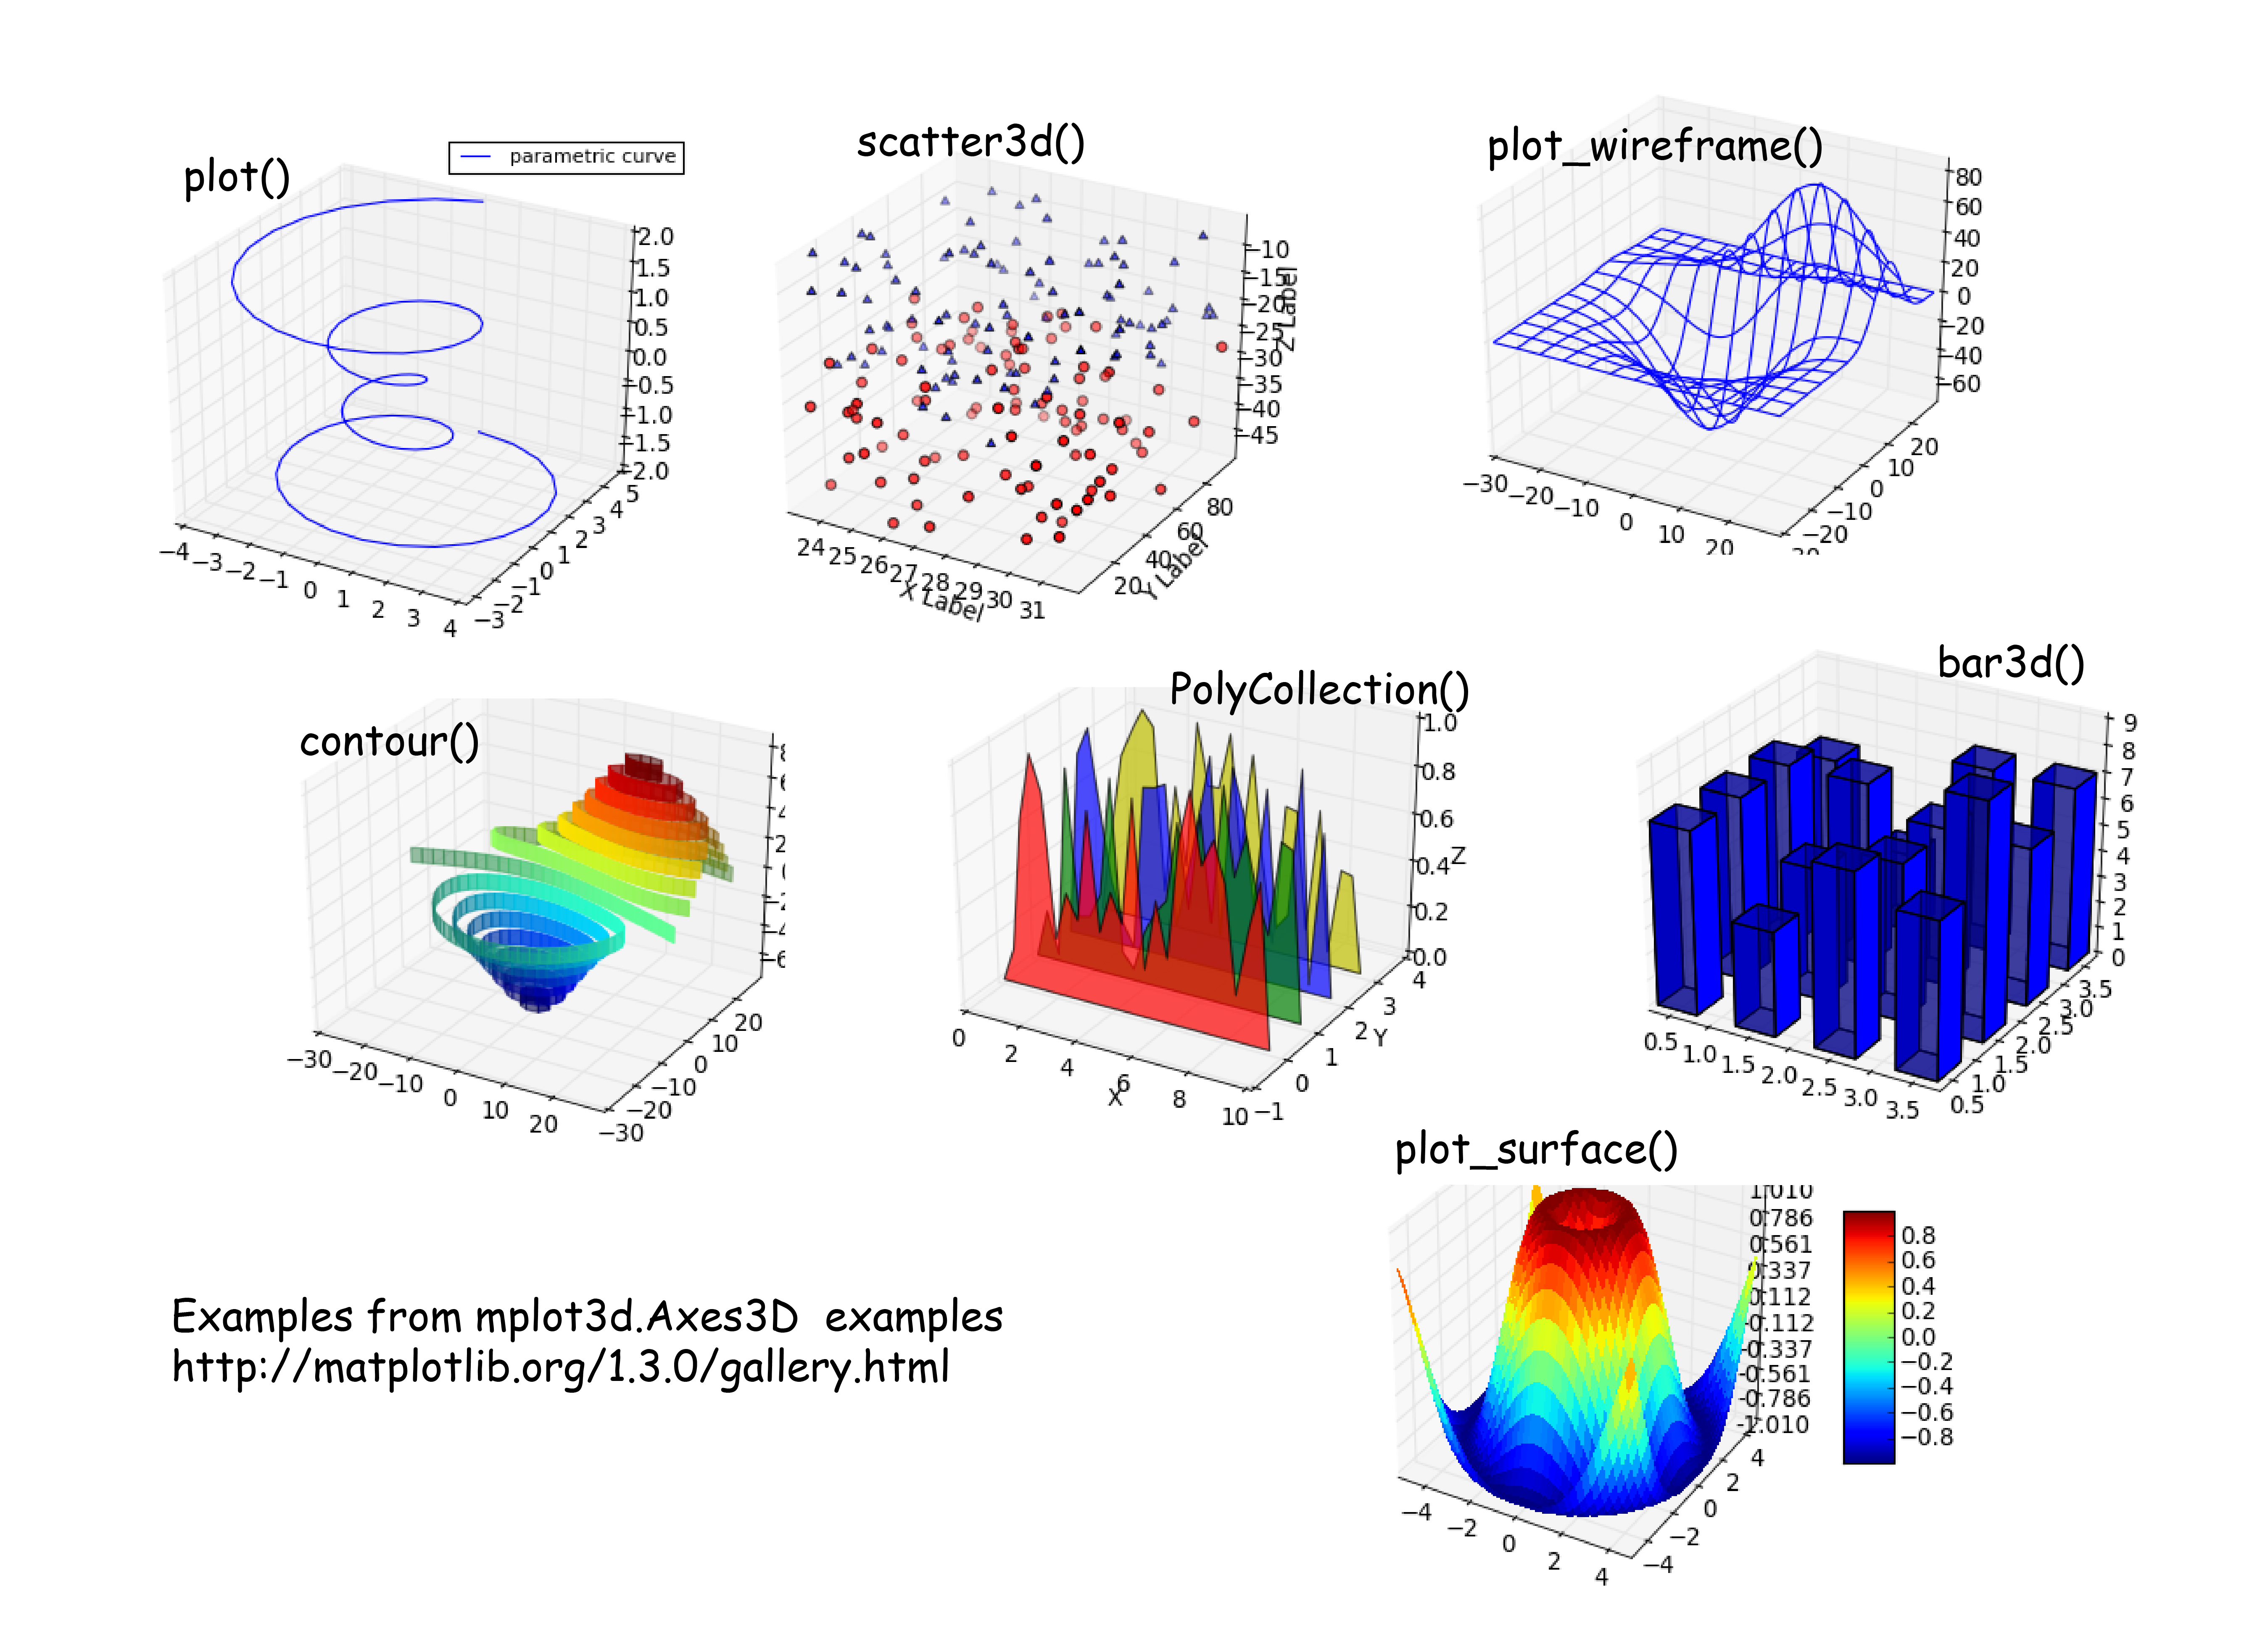

In [26]:
Image(filename='Figures/mplot3d-examples.png')